This notebook Creates an ensable neural network given keras model, with the possibility of evaluation using: F1 scores, Accuracy, Confusion matrix

In [ ]:
import tensorflow as tf
import tensorflow.keras as tfk
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
def show_confusion(model, validation_dataset):
  Y_pred = model.predict(validation_dataset)
  y_pred = np.argmax(Y_pred, axis=1)
  y_test= np.concatenate([np.argmax(y, axis=1) for x, y in validation_dataset], axis=0)

  cm = confusion_matrix(y_test, y_pred)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm)

  disp.plot(cmap=plt.cm.Blues)
  plt.show()

  f1_scores = f1_score(y_test, y_pred, average=None)
  mean_f1 = np.mean(f1_scores)

  print(f"\nF1 scores: {f1_scores}")
  print(f"\nMean F1 : {mean_f1}")
  print(f"\nAccuracy : {accuracy_score(y_test, y_pred)}")

In [ ]:
# Random seed for reproducibility
seed = 44

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
# Dataset folders 
dataset_dir = '../gdrive/MyDrive/ann_dataset'
dataset_folder = os.path.join(dataset_dir, 'ann_dataset')

test_folder = os.path.join(dataset_dir, 'test')
train_folder = os.path.join(dataset_dir, 'train')

In [ ]:
  batch_size = 64
  train_dataset = tfk.utils.image_dataset_from_directory(
      directory=train_folder,
      labels="inferred",
      label_mode="categorical",
      color_mode='rgb',
      image_size=(96,96),
      batch_size=batch_size
  )
  validation_dataset = tfk.utils.image_dataset_from_directory(
      directory=test_folder,
      labels="inferred",
      label_mode="categorical",
      color_mode='rgb',
      image_size=(96,96),
  )
  AUTOTUNE = tf.data.AUTOTUNE
  train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
  validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 3624 files belonging to 8 classes.
Found 719 files belonging to 8 classes.


In [ ]:
!unzip ../gdrive/MyDrive/Ann_Challenge/Experiments/Model090B.zip

Archive:  ../gdrive/MyDrive/Ann_Challenge/Experiments/Model090B.zip
   creating: Model_name16691203880.904/
  inflating: Model_name16691203880.904/saved_model.pb  
   creating: Model_name16691203880.904/variables/
  inflating: Model_name16691203880.904/variables/variables.data-00000-of-00001  
  inflating: Model_name16691203880.904/variables/variables.index  
  inflating: Model_name16691203880.904/keras_metadata.pb  
   creating: Model_name16691203880.904/assets/


In [ ]:
!unzip ../gdrive/MyDrive/Ann_Challenge/Experiments/Model090A.zip

Archive:  ../gdrive/MyDrive/Ann_Challenge/Experiments/Model090A.zip
   creating: Model_name16691224010.9054/
  inflating: Model_name16691224010.9054/saved_model.pb  
   creating: Model_name16691224010.9054/variables/
  inflating: Model_name16691224010.9054/variables/variables.data-00000-of-00001  
  inflating: Model_name16691224010.9054/variables/variables.index  
  inflating: Model_name16691224010.9054/keras_metadata.pb  
   creating: Model_name16691224010.9054/assets/


In [ ]:
!unzip ../gdrive/MyDrive/Ann_Challenge/Experiments/Model90C.zip

Archive:  ../gdrive/MyDrive/Ann_Challenge/Experiments/Model90C.zip
   creating: Model_name1669066256/
  inflating: Model_name1669066256/saved_model.pb  
   creating: Model_name1669066256/variables/
  inflating: Model_name1669066256/variables/variables.data-00000-of-00001  
  inflating: Model_name1669066256/variables/variables.index  
  inflating: Model_name1669066256/keras_metadata.pb  
   creating: Model_name1669066256/assets/


In [ ]:
!unzip ../gdrive/MyDrive/Ann_Challenge/Experiments/Model_zip_8846.zip

Archive:  ../gdrive/MyDrive/Ann_Challenge/Experiments/Model_zip_8846.zip
replace Model_name16692154860.8846/variables/variables.index? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip ../gdrive/MyDrive/Ann_Challenge/Experiments/Model088.zip

In [ ]:
models = []

In [ ]:
model_a = tf.keras.models.load_model('Model_name16691203880.904')
model_b = tf.keras.models.load_model('Model_name16691224010.9054')
model_c = tf.keras.models.load_model('Model_name1669066256')

In [ ]:
model_d = tf.keras.models.load_model('Model_name16692154860.8846')

In [ ]:
# add here model to ensable
models = [model_a, model_b, model_c]

23/23 [==============================] - 216s 6s/step


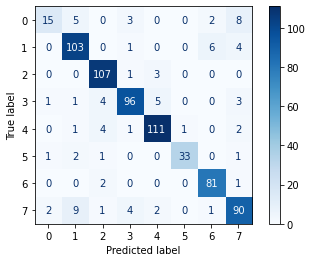


F1 scores: [0.57692308 0.87659574 0.93043478 0.88888889 0.92116183 0.91666667
 0.93103448 0.82568807]

Mean F1 : 0.8584241927059295

Accuracy : 0.8845618915159944


In [ ]:
show_confusion(model_d, validation_dataset)

23/23 [==============================] - 27s 996ms/step


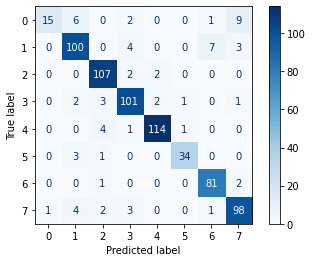


F1 scores: [0.6122449  0.87336245 0.93449782 0.9058296  0.95798319 0.91891892
 0.93103448 0.88288288]

Mean F1 : 0.8770942792772758

Accuracy : 0.9040333796940194


In [ ]:
show_confusion(model_a, validation_dataset)

23/23 [==============================] - 27s 1s/step


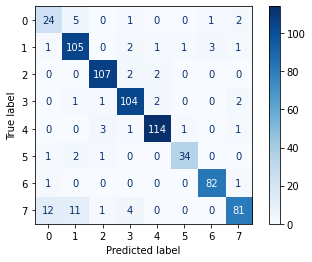


F1 scores: [0.66666667 0.88235294 0.95535714 0.92857143 0.9539749  0.91891892
 0.96470588 0.82233503]

Mean F1 : 0.8866103626652211

Accuracy : 0.9054242002781642


In [ ]:
show_confusion(model_b, validation_dataset)

23/23 [==============================] - 27s 1s/step


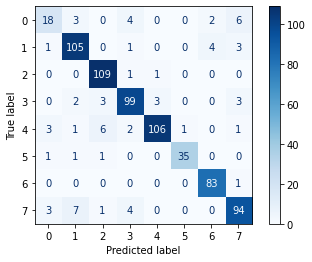


F1 scores: [0.61016949 0.90128755 0.94372294 0.8959276  0.92173913 0.94594595
 0.95953757 0.86635945]

Mean F1 : 0.8805862107932579

Accuracy : 0.9026425591098748


In [ ]:
show_confusion(model_c, validation_dataset)

In [ ]:
for i,m in enumerate(models):
  m._name = f"{m.name}{i}" 
model_input = tf.keras.Input(shape=(96, 96, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

23/23 [==============================] - 105s 4s/step


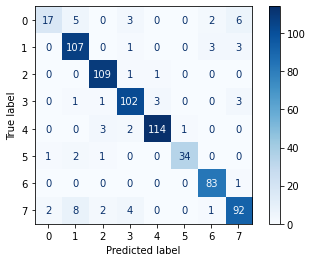


F1 scores: [0.64150943 0.90295359 0.96035242 0.91479821 0.95798319 0.93150685
 0.95953757 0.85981308]

Mean F1 : 0.8910567935755668

Accuracy : 0.9151599443671766


In [ ]:
show_confusion(ensemble_model, validation_dataset)

In [ ]:
ensemble_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 model0 (Functional)            (None, 8)            18134887    ['input_1[0][0]']                
                                                                                                  
 model1 (Functional)            (None, 8)            18134887    ['input_1[0][0]']                
                                                                                                  
 model2 (Functional)            (None, 8)            17688167    ['input_1[0][0]']                
                                                                                              

In [ ]:
%load_ext cython

In [ ]:
model_c.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 sequential_7 (Sequential)   (None, 96, 96, 3)         0         
                                                                 
 efficientnetb4 (Functional)  (None, 3, 3, 1792)       17673823  
                                                                 
 global_average_pooling2d_7   (None, 1792)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 8)                 14344     
                                                                 
Total params: 17,688,167
Trainable params: 17,433,452
Non-trainable params: 254,715
__________________________________________

In [ ]:
%%cython
from __main__ import ensemble_model
ensemble_model.save("ensabled_abc")

In [ ]:
from google.colab import files

In [ ]:
files.download("./ensabled_abc/")

In [ ]:
!zip -r ../gdrive/MyDrive/Ann_Challenge/Experiments/ensable.zip ./ensabled_abc 

  adding: ensabled_abc/ (stored 0%)
  adding: ensabled_abc/variables/ (stored 0%)
  adding: ensabled_abc/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: ensabled_abc/variables/variables.index (deflated 77%)
  adding: ensabled_abc/keras_metadata.pb (deflated 96%)
  adding: ensabled_abc/saved_model.pb (deflated 92%)
  adding: ensabled_abc/assets/ (stored 0%)


In [ ]:
files.download("./ensable.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>